#### In this exercise, you will create a logistic regression model on diabete dataset.

**Predictors**: Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction, and Age
**Target variale** : Outcome

1. first read the data into your IDE

In [1]:
## your syntax here##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the diabetes dataset
file_path = "/content/drive/My Drive/Colab Notebooks/diabetes.csv"
df = pd.read_csv(file_path)


Mounted at /content/drive


Then,

1) assign predictors to X, and standardize all the predictors, and save the value after standardization to X_standardized object.

2) assign the target variable to y

In [2]:
## your syntax here##
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

 next, split the data into training set and test set, with 20% used as test set, **set random_state = 0**

In [3]:
## your syntax here##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Now let's create a logistis regression model called "logreg", and fit this model to training data.

In [4]:
## your syntax here##
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Then exponentiate coefficients in .coef_ attribute, and sort them in either descending or ascending order

In [5]:
## your syntax here##
# Exponentiate coefficients and sort them
coefficients = np.exp(model.coef_).flatten()
feature_names = X.columns
sorted_features = sorted(zip(coefficients, feature_names), reverse=True)
print("Feature Importance (Exponentiated Coefficients):")
for coef, feature in sorted_features:
    print(f"{feature}: {coef:.4f}")

Feature Importance (Exponentiated Coefficients):
Glucose: 3.1398
BMI: 2.0419
Pregnancies: 1.4523
DiabetesPedigreeFunction: 1.2911
Age: 1.2022
SkinThickness: 1.0688
Insulin: 0.8805
BloodPressure: 0.8207


In this step first use .predict() to apply the model on the test set, and get the accuracy on the test using .accuracy_score()

In [6]:
## your syntax here##
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


Lastly create a confusion matrix on the test set using .plot_confusion_matrix() and inteprete the confusion matrix.

Model Accuracy: 0.71
Confusion Matrix:
[[82 18]
 [26 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



<Figure size 500x400 with 0 Axes>

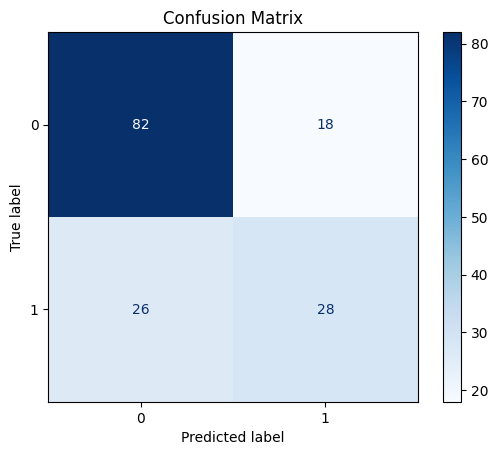

In [9]:
# Display results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualizing Confusion Matrix
plt.figure(figsize=(5, 4))
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
